PHẦN I: 
Tập dữ liệu Auto_Sales.csv chứa thông tin về các đơn hàng, doanh số, khách hàng và sản phẩm. Bạn cần thực hiện các phân tích sau:
Câu 1 (1 điểm): Kiểm tra thông tin và kiểu dữ liệu.  Liệt kê các trạng thái đơn hàng (STATUS) có trong tập dữ liệu
Câu 2 (1 điểm): Tính tổng doanh số theo từng quốc gia. Vẽ biểu đồ cột thể hiện doanh số theo quốc gia. Nhận xét.
Câu 3 (1 điểm): Biểu đồ tròn thể hiện tỷ lệ các kích cỡ đơn hàng (DEALSIZE). Nhận xét.
Câu 4 (1.5 điểm): Tính tổng doanh số theo tháng. Từ đó chọn biểu đồ thể hiện xu hướng doanh số theo tháng. 
Câu 5 (1.5 điểm): Tạo bảng tổng hợp doanh số theo trạng thái đơn hàng. Vẽ biểu đồ tròn thể hiện tỷ lệ doanh số theo trạng thái đơn hàng

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, binom, norm

In [5]:
# Doc du lieu
df = pd.read_csv(r'D:\Zalo\Auto_Sales.csv')

In [6]:
# Cau 1
# Kiểm tra thông tin
df.info()
# Kiểu dữ liệu
df.dtypes
# Liệu kê trạng thái đơn hàng (STATUS) có trong tập dữ liệu
df['STATUS'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3355575.69
Name: SALES, dtype: float64


<Axes: xlabel='COUNTRY'>

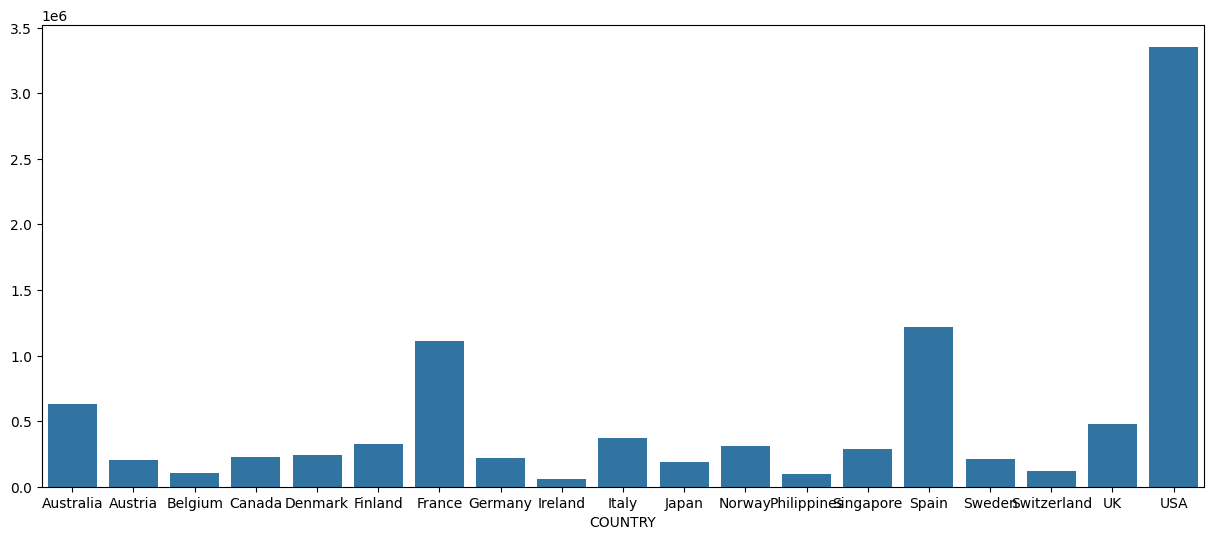

In [14]:
# Câu 2
# Tính tổng danh số cho từng quốc gia
total_sale_by_country = df.groupby('COUNTRY')['SALES'].sum()
print(total_sale_by_country)
# Vẽ biểu đồ cột thể hiện doanh số theo quốc gia
plt.figure(figsize=(15,6))
sns.barplot(x=total_sale_by_country.index, y=total_sale_by_country.values)

Nhận xét : Doanh thu của USA cao vượt trội hơn so với các nước khác - 3.5 . Doanh thu của Spain, France, Australia cao theo sau rồi tới các nước còn lại, dao động dưới 0.5

(np.float64(-1.0999988995749401),
 np.float64(1.0999997389420753),
 np.float64(-1.099999337756871),
 np.float64(1.0999921207607894))

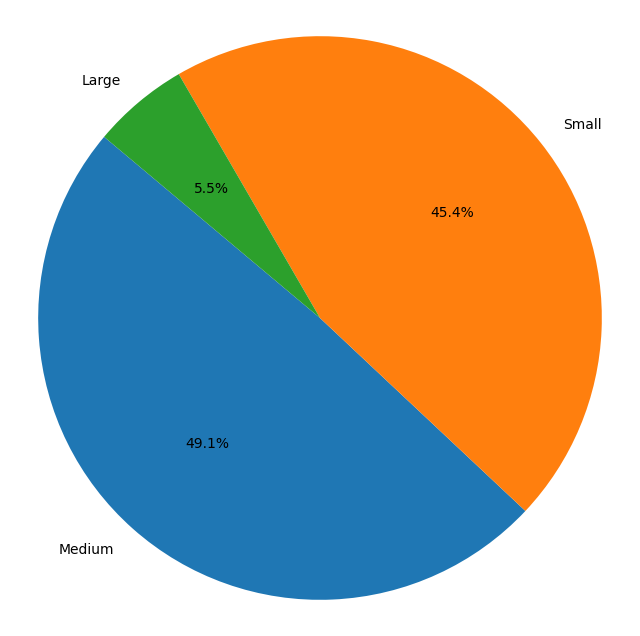

In [8]:
# Câu 3 
# Biểu đồ tròn thể hiện tỷ lệ các kích cỡ đơn hàng (DEALSIZE)
deal_size_counts = df['DEALSIZE'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(deal_size_counts, labels=deal_size_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

Tỉ lệ kích cỡ đơn hàng large thấp hơn đáng kể so với medium và small - 5,5%. Tỉ lệ 2 kích cỡ small với medium xấp xỉ nhau (49,1% và 45,5%)

<Axes: xlabel='MONTH'>

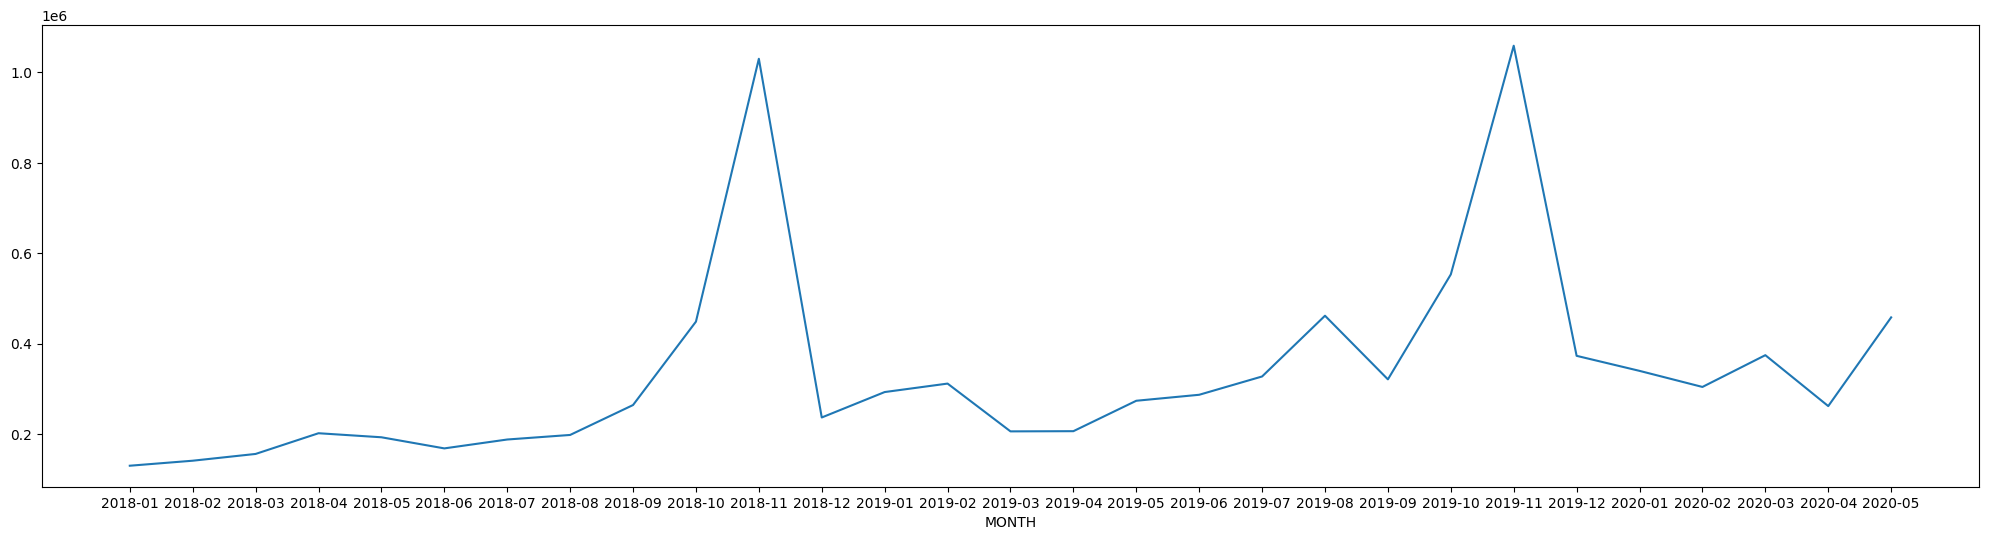

In [16]:
# Câu 4
# Tính tổng doanh số theo tháng. Từ đó chọn biểu đồ thể hiện xu hướng doanh số theo tháng. 
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['MONTH'] = df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('MONTH')['SALES'].sum()
plt.figure(figsize=(25,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values) 

Biểu đồ đường thể hiện rõ xu hướng doanh thu hơn các biểu đồ khác

(np.float64(-1.0999997297520598),
 np.float64(1.0999998334229395),
 np.float64(-1.1000000071154938),
 np.float64(1.0999997176634484))

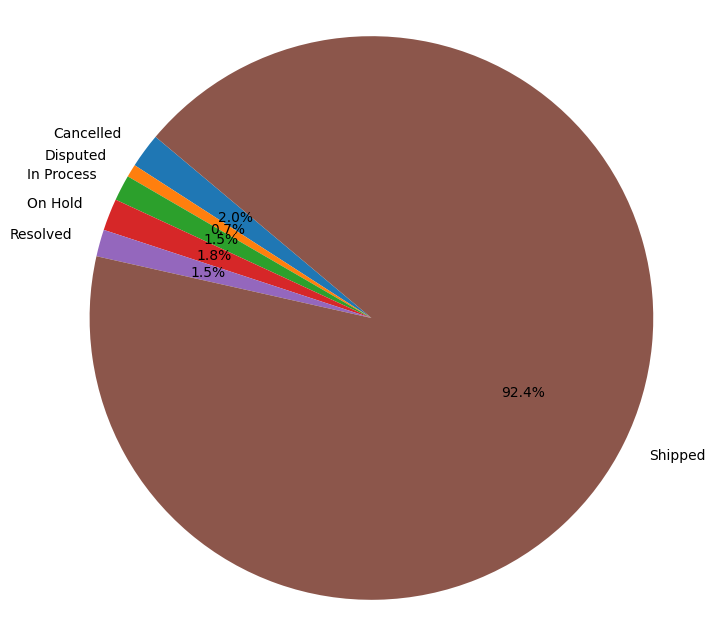

In [10]:
# Câu 5
# Tạo bảng tổng hợp doanh số theo trạng thái đơn hàng. Vẽ biểu đồ tròn thể hiện tỷ lệ doanh số theo trạng thái đơn hàng
status_sales = df.groupby('STATUS')['SALES'].sum()
plt.figure(figsize=(8,8))
plt.pie(status_sales, labels=status_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

Câu 6 (4đ): Một công ty sản xuất linh kiện điện tử đang nghiên cứu về tỷ lệ lỗi trong sản phẩm, số lượng sản phẩm đạt tiêu chuẩn, cũng như thời gian hoàn thành một đơn hàng. Quá trình sản xuất được mô hình hóa bằng các phân phối xác suất phù hợp.
(a) (1 điểm) Trung bình mỗi đơn hàng có 3 lỗi sản xuất. Giả sử số lỗi tuân theo phân phối Poisson. Tính xác suất một đơn hàng có nhiều hơn 4 lỗi.
(b) (1 điểm) Mỗi đơn hàng gồm 25 linh kiện, và xác suất mỗi linh kiện đạt tiêu chuẩn là 92%. Tính xác suất một đơn hàng có chính xác 22 linh kiện đạt tiêu chuẩn.
(c) (2 điểm) Thời gian hoàn thành một đơn hàng tuân theo phân phối chuẩn, với trung bình 60 phút và độ lệch chuẩn 6 phút.
●	Tính xác suất một đơn hàng được hoàn thành trong vòng 55 phút.
●	Để nằm trong top 10% đơn hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian bao nhiêu?

In [11]:
# Câu 6a
lamda = 3
prob_more_than_4_errors = 1 - poisson.cdf(4, lamda)
print(f'Xác suất một đơn hàng có nhiều hơn 4 lỗi: {prob_more_than_4_errors:.4f}')

Xác suất một đơn hàng có nhiều hơn 4 lỗi: 0.1847


In [12]:
# Câu 6b
p = 0.92
k = 22
prob_exactly_22_good = binom.pmf(k, n, p)
print(f'Xác suất một đơn hàng có chính xác 22 linh kiện đạt tiêu chuẩn: {prob_exactly_22_good:.4f}')


Xác suất một đơn hàng có chính xác 22 linh kiện đạt tiêu chuẩn: 0.1881


In [13]:
# Câu 6c
# Tính xác suất một đơn hàng được hoàn thành trong vòng 55 phút.
mu = 60
sigma = 6
z_55 = (55 - mu) / sigma
prob_within_55 = norm.cdf(z_55)
print(f'Xác suất một đơn hàng được hoàn thành trong vòng 55 phút: {prob_within_55:.4f}')

# Để nằm trong top 10% đơn hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian bao nhiêu?
z_10 = norm.ppf(0.9)
time_10 = mu + z_10 * sigma
print(f'Để nằm trong top 10% đơn hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian: {time_10:.2f} phút')

Xác suất một đơn hàng được hoàn thành trong vòng 55 phút: 0.2023
Để nằm trong top 10% đơn hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian: 67.69 phút
